In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter, laplace, minimum_filter, maximum_filter, median_filter

# Load grayscale image
image = cv2.imread('sukuna.jpg', cv2.IMREAD_GRAYSCALE)

A Gaussian filter is classified as a linear filter because it applies a weighted sum of pixel intensities using a Gaussian function, and it affects spatial frequency components by attenuating high-frequency noise while preserving low-frequency structures, resulting in image smoothing.

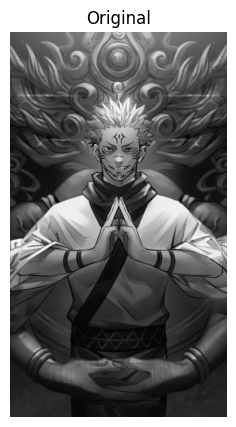

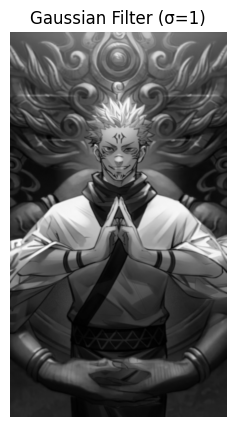

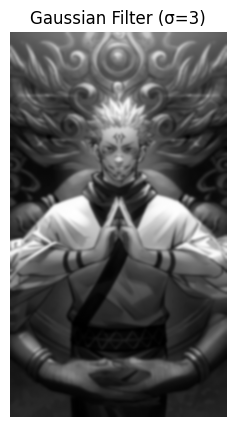

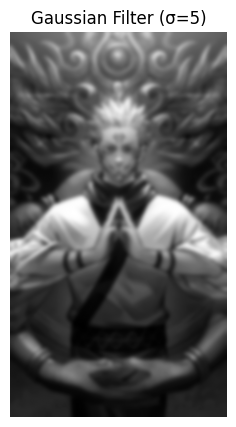

In [2]:
# Display function
def show_image(title, img):
    plt.figure(figsize=(5,5))
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

# Q1: Apply Gaussian Filter
def apply_gaussian(image, sigma=1, border=cv2.BORDER_DEFAULT):
    return cv2.GaussianBlur(image, (0, 0), sigmaX=sigma, borderType=border)

# Test Gaussian filter with different sigma values
gaussian1 = apply_gaussian(image, sigma=1)
gaussian3 = apply_gaussian(image, sigma=3)
gaussian5 = apply_gaussian(image, sigma=5)

show_image("Original", image)
show_image("Gaussian Filter (σ=1)", gaussian1)
show_image("Gaussian Filter (σ=3)", gaussian3)
show_image("Gaussian Filter (σ=5)", gaussian5)



A box filter (mean filter) would also smooth the image but would produce more blurring and less natural transitions than a Gaussian filter, as it gives equal weight to all pixels in the kernel, leading to poorer edge preservation and increased artifacts.

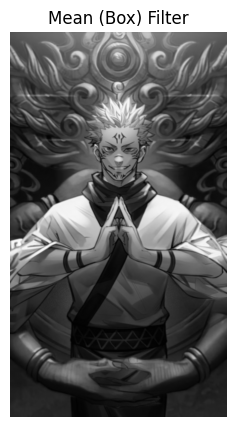

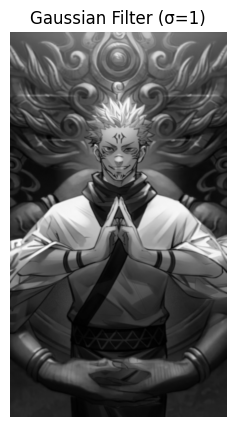

In [3]:
# Q2: Box (Mean) Filter vs. Gaussian Filter
def apply_mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

box_filter = apply_mean_filter(image, 3)

show_image("Mean (Box) Filter", box_filter)
show_image("Gaussian Filter (σ=1)", gaussian1)

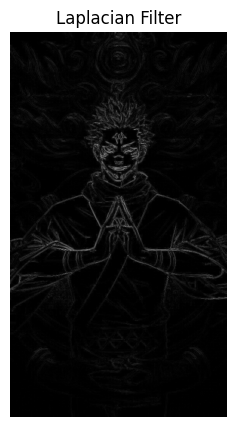

In [ ]:
# Q3: Apply Laplacian Filter
def apply_laplacian(image):
    return cv2.Laplacian(image, cv2.CV_64F, ksize=3)

laplacian = apply_laplacian(image)
show_image("Laplacian Filter", np.abs(laplacian))


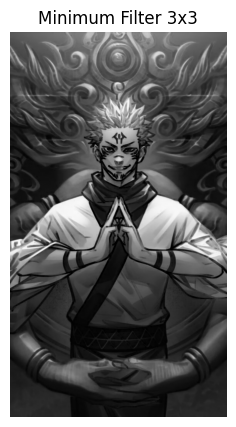

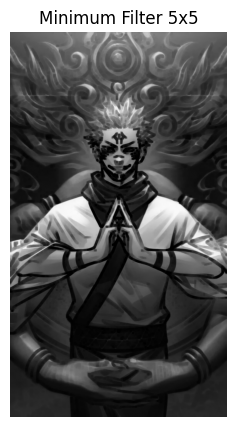

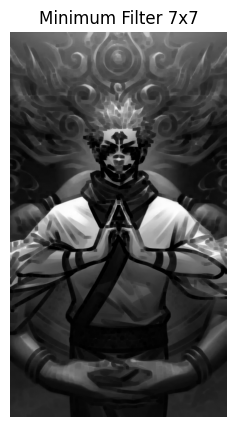

In [5]:
# Q4: Minimum Filter (Salt Noise Removal)
def apply_minimum_filter(image, size=3):
    return minimum_filter(image, size=size)

min_3x3 = apply_minimum_filter(image, 3)
min_5x5 = apply_minimum_filter(image, 5)
min_7x7 = apply_minimum_filter(image, 7)

show_image("Minimum Filter 3x3", min_3x3)
show_image("Minimum Filter 5x5", min_5x5)
show_image("Minimum Filter 7x7", min_7x7)

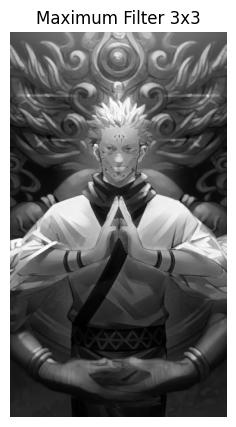

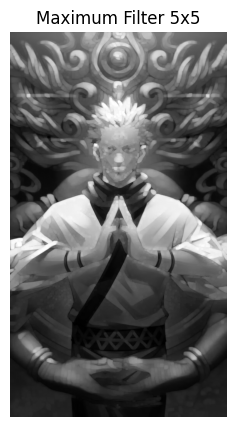

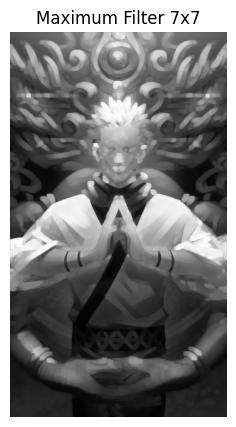

In [6]:
# Q5: Maximum Filter (Pepper Noise Removal)
def apply_maximum_filter(image, size=3):
    return maximum_filter(image, size=size)

max_3x3 = apply_maximum_filter(image, 3)
max_5x5 = apply_maximum_filter(image, 5)
max_7x7 = apply_maximum_filter(image, 7)

show_image("Maximum Filter 3x3", max_3x3)
show_image("Maximum Filter 5x5", max_5x5)
show_image("Maximum Filter 7x7", max_7x7)

A median filter is considered a non-linear filter because it replaces each pixel with the median of its neighborhood instead of computing a weighted sum, making it effective at preserving edges while removing salt-and-pepper noise, unlike a Gaussian filter, which blurs the noise rather than eliminating it.

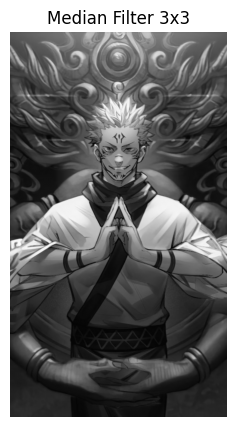

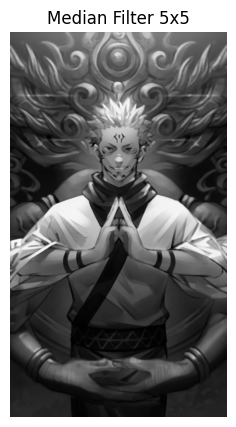

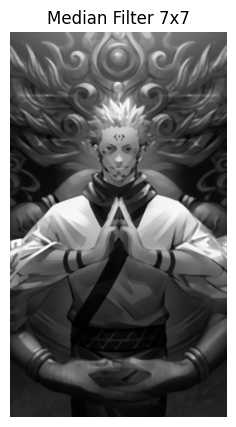

In [7]:
# Q6: Median Filter (Non-linear)
def apply_median_filter(image, size=3):
    return median_filter(image, size=size)

median_3x3 = apply_median_filter(image, 3)
median_5x5 = apply_median_filter(image, 5)
median_7x7 = apply_median_filter(image, 7)

show_image("Median Filter 3x3", median_3x3)
show_image("Median Filter 5x5", median_5x5)
show_image("Median Filter 7x7", median_7x7)

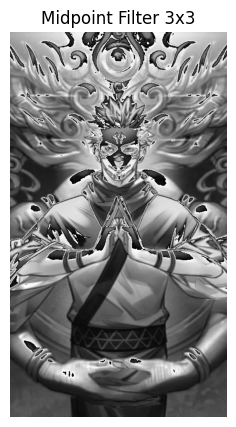

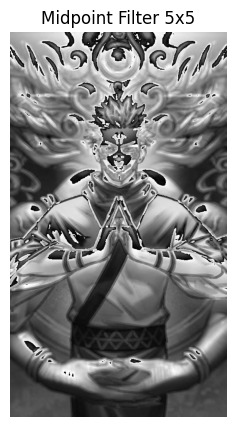

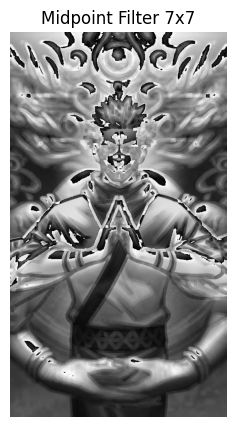

In [8]:
# Q7: Midpoint Filter
def apply_midpoint_filter(image, size=3):
    min_filter = minimum_filter(image, size=size)
    max_filter = maximum_filter(image, size=size)
    return (min_filter + max_filter) // 2

midpoint_3x3 = apply_midpoint_filter(image, 3)
midpoint_5x5 = apply_midpoint_filter(image, 5)
midpoint_7x7 = apply_midpoint_filter(image, 7)

show_image("Midpoint Filter 3x3", midpoint_3x3)
show_image("Midpoint Filter 5x5", midpoint_5x5)
show_image("Midpoint Filter 7x7", midpoint_7x7)